In [1]:
#Установка всех используемых модулей
import warnings
warnings.filterwarnings("ignore")
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import seaborn as sns  
from sklearn.model_selection import train_test_split
#Считывание данных
%matplotlib inline
df = pd.read_csv('/home/violett/Downloads/train-20220729T174029Z-001/train/train.csv')
print('Размер выборки:', df.shape)
df.head( )

Размер выборки: (519803, 57)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,885116c8-8e5c-4d4e-af4d-1fd53c6b2464,1.543564e+09,7,30,11,2018-11-30 07:47:56,America/New_York,North Station,South Station,Lyft,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
1,93fb610d-bb94-45bc-98b8-0a4a2e349ab2,1.544822e+09,21,14,12,2018-12-14 21:20:11,America/New_York,West End,South Station,Uber,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
2,69244a0f-6ec6-4265-b73e-3dcb069d671e,1.543834e+09,10,3,12,2018-12-03 10:52:59,America/New_York,Theatre District,Boston University,Lyft,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
3,230cbecb-368e-4b8d-b9f1-67a40f68991f,1.543759e+09,14,2,12,2018-12-02 14:03:04,America/New_York,Boston University,Back Bay,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
4,6c873c64-967e-47f2-bd89-5ec6fd330aa3,1.544973e+09,15,16,12,2018-12-16 15:05:17,America/New_York,Financial District,North End,Lyft,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800


In [2]:
#Посмотрим информацию о наших данных. 11 колонок с типом object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519803 entries, 0 to 519802
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           519803 non-null  object 
 1   timestamp                    519803 non-null  float64
 2   hour                         519803 non-null  int64  
 3   day                          519803 non-null  int64  
 4   month                        519803 non-null  int64  
 5   datetime                     519803 non-null  object 
 6   timezone                     519803 non-null  object 
 7   source                       519803 non-null  object 
 8   destination                  519803 non-null  object 
 9   cab_type                     519803 non-null  object 
 10  product_id                   519803 non-null  object 
 11  name                         519803 non-null  object 
 12  price                        478523 non-null  float64
 13 

In [3]:
df.isnull().sum()  # посмотрим на то есть ли в переменных пропуски

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          41280
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [4]:
#Заменим отсутсвующие значения в price на среднее по всей выборке
def impute_NA_with_avg(data,NA_col=[]):
    data_copy = data.copy(deep=True)
    for i in NA_col:
        if data_copy[i].isnull().sum()>0:
            data_copy[i] = data_copy[i].fillna(data[i].mean())
        else:
            warnings.warn("Нет пропущенных значений" % i)
    return data_copy 

In [5]:
data = impute_NA_with_avg(data=df,NA_col=['price'])

In [6]:

df_copy = data.copy(deep=True)
df_copy=df_copy.drop(['id'], axis=1)#id для анализа нам не нужен
df_copy=df_copy.drop(['timestamp'], axis=1)#дублирование данных о времени
df_copy=df_copy.drop(['datetime'], axis=1)#дублирование данных
df_copy=df_copy.drop(['timezone'], axis=1)#все данные для одного региона
df_copy=df_copy.drop(['product_id'], axis=1)#дублирует name
#df_selected = df_copy.select_dtypes(exclude=['object']) #получаем все кроме объектов
df_copy.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,7,30,11,North Station,South Station,Lyft,Lyft,9.0,2.07,1.0,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
1,21,14,12,West End,South Station,Uber,Black SUV,27.0,2.14,1.0,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
2,10,3,12,Theatre District,Boston University,Lyft,Shared,10.5,4.80,1.0,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
3,14,2,12,Boston University,Back Bay,Uber,UberX,7.0,0.03,1.0,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
4,15,16,12,Financial District,North End,Lyft,Lyft,7.0,1.02,1.0,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800


In [7]:
df_copy.isnull().sum()  # Проверим, что все нулевые значения исчезли

hour                           0
day                            0
month                          0
source                         0
destination                    0
cab_type                       0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTe

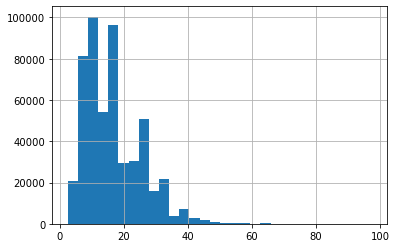

In [8]:
#Посмотрим на целевую переменную
df_copy.price.hist(bins=30);

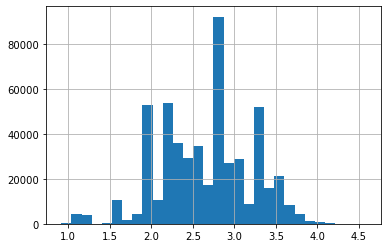

In [25]:
#Сглаживаем распределение цен
df_copy['price'] = np.log(df_copy['price'])
df_copy.price.hist(bins=30);

In [27]:
#Средняя цена
mean_price = np.mean(df_copy['price'])
mean_price

16.53745943246197

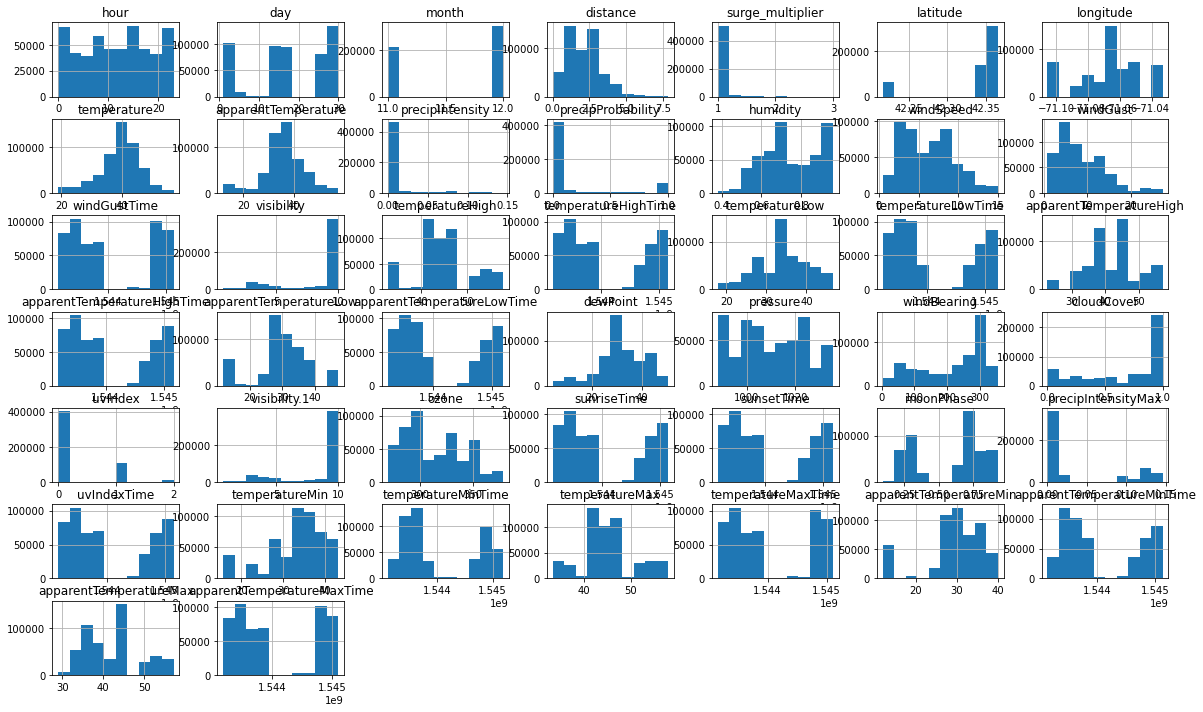

In [26]:
#Распределение остальных признаков
df_copy.drop('price',axis=1).hist(figsize=(20, 12));

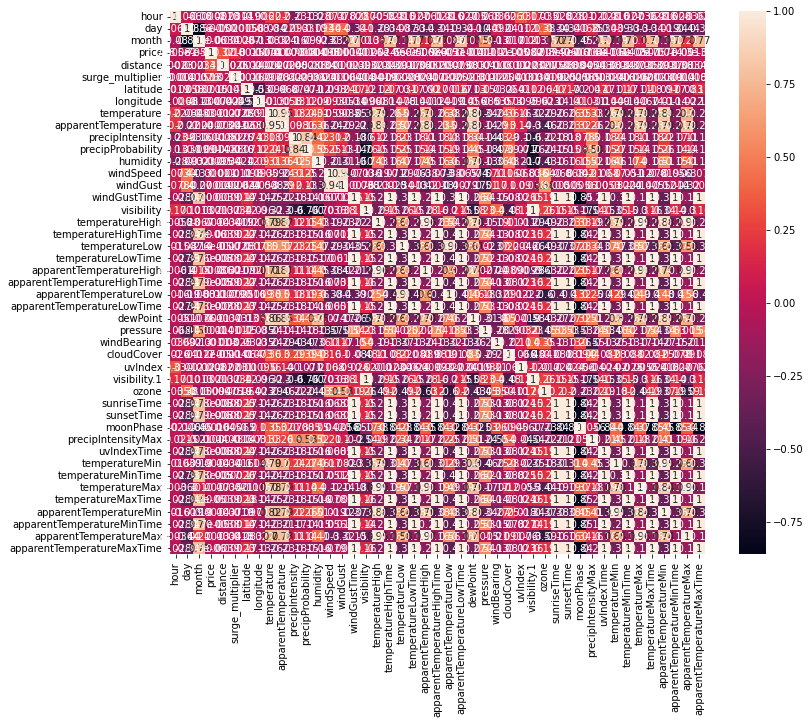

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_copy.corr(), annot=True);

In [ ]:
sns.pairplot(df_copy)

In [46]:
##Преобразовали категориальные переменные

In [8]:
df_categor = pd.get_dummies(df_copy['cab_type'], drop_first=True, prefix='cab_type')
# Объединили назад наши таблички
df_copy = pd.concat([df_copy.drop('cab_type',axis=1),df_categor], axis=1)

In [9]:
df_categor = pd.get_dummies(df_copy['source'], drop_first=True, prefix='source')
df_copy = pd.concat([df_copy.drop('source',axis=1),df_categor], axis=1)

In [10]:
df_categor = pd.get_dummies(df_copy['destination'], drop_first=True, prefix='source')
df_copy = pd.concat([df_copy.drop('destination',axis=1),df_categor], axis=1)

In [11]:
df_categor = pd.get_dummies(df['name'], drop_first=True, prefix='name')
df_copy = pd.concat([df_copy.drop('name',axis=1),df_categor], axis=1)

In [12]:
df_categor = pd.get_dummies(df_copy['short_summary'], drop_first=True, prefix='short_summary')
df_copy = pd.concat([df_copy.drop('short_summary',axis=1),df_categor], axis=1)

In [13]:
df_categor = pd.get_dummies(df_copy['long_summary'], drop_first=True, prefix='long_summary')
df_copy = pd.concat([df_copy.drop('long_summary',axis=1),df_categor], axis=1)

In [14]:
df_categor = pd.get_dummies(df_copy['icon'], drop_first=True, prefix='icon')
df_copy = pd.concat([df_copy.drop('icon',axis=1),df_categor], axis=1)
df_copy.head()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,7,30,11,9.0,2.07,1.0,42.3559,-71.0550,30.42,30.42,...,0,0,0,0,1,0,0,0,0,0
1,21,14,12,27.0,2.14,1.0,42.3398,-71.0892,42.91,41.40,...,0,0,0,0,0,0,0,0,1,0
2,10,3,12,10.5,4.80,1.0,42.2148,-71.0330,48.43,48.43,...,0,0,0,0,0,1,0,0,0,0
3,14,2,12,7.0,0.03,1.0,42.3588,-71.0707,43.51,39.58,...,0,0,0,0,0,0,0,0,0,1
4,15,16,12,7.0,1.02,1.0,42.3647,-71.0542,42.25,37.39,...,0,0,1,0,0,1,0,0,0,0


In [15]:
print('Размер выборки:', df_copy.shape)

Размер выборки: (519803, 104)


In [16]:
#Делим на тест и трейн
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_copy, test_size = 0.3)

In [17]:
#Шкалироание Было убрано, так как с им все метрики показывали неверные значения
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# учим скалировщик скалировать все переменны на трэйне

#scaler.fit(df_train[df_selected.columns.values.tolist()]) 


In [18]:
# Применяем скалировщик к трэйну
#df_train_scale = scaler.transform(df_train[df_selected.columns.values.tolist()])

# Применяем скалирвощик к тесту 
#df_test_scale = scaler.transform(df_test[df_selected.columns.values.tolist()])

In [19]:
# Заменяем значения на отскалированные
#df_train[df_selected.columns.values.tolist()] = df_train_scale
#df_test[df_selected.columns.values.tolist()] = df_test_scale

In [20]:
#print(df_train.shape) # Посмотрим на размеры трэйна и теста 
#print(df_test.shape)  

(363862, 104)
(155941, 104)


In [21]:
#df_train.head()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
161975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
129634,-0.518418,-1.582385,0.838972,-0.164689,-0.334215,-0.157617,0.584134,0.149858,-0.094691,0.136845,...,0,0,0,0,0,0,0,0,0,1
171686,0.632573,1.023093,-1.191935,0.692793,0.572164,-0.157617,0.584134,0.149858,0.233756,-0.005869,...,0,0,0,0,0,0,0,1,0,0
289558,1.208069,1.123303,-1.191935,-0.807800,-0.783005,-0.157617,0.584134,0.149858,0.432905,0.073697,...,0,0,0,0,0,0,0,1,0,0
347525,-1.525535,-0.379857,0.838972,-0.647022,-0.686207,-0.157617,0.034997,-1.135489,-1.329713,-0.662604,...,0,0,0,0,0,1,0,0,0,0


In [22]:
#df_train.index = np.arange(len(df_train))
#df_test.index = np.arange(len(df_test))

In [37]:
df_train.head()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,long_summary_ Possible drizzle in the morning.,long_summary_ Rain in the morning and afternoon.,long_summary_ Rain throughout the day.,"long_summary_ Rain until morning, starting again in the evening.",icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
6938,7,17,12,2.803360,2.31,1.0,42.3519,-71.0643,38.41,31.98,...,0,0,0,0,0,0,0,0,0,1
431420,9,17,12,2.442347,4.44,1.0,42.3644,-71.0661,35.84,29.23,...,0,0,0,0,0,0,0,0,0,1
223107,22,28,11,2.805628,2.01,1.0,42.3647,-71.0542,40.43,34.59,...,0,0,0,0,0,1,0,0,0,0
175436,10,29,11,3.113515,2.95,1.0,42.3519,-71.0643,37.92,32.00,...,0,0,0,0,0,0,0,0,1,0
276648,17,1,12,3.496508,3.07,1.0,42.3505,-71.1054,41.89,41.89,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df_train= df_train.dropna(how='any')#Удалим данные с отсутсвующими значениями
df_test= df_test.dropna(how='any')#Удалим данные с отсутсвующими значениями

In [19]:
y_train = df_train.price
y_test = df_test.price 
X_train = df_train.drop('price', axis=1).to_numpy()
X_test = df_test.drop('price', axis=1).to_numpy()

In [20]:
#Прогноз
y_mean= np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean 
y_pred_naive

array([16.53730994, 16.53730994, 16.53730994, ..., 16.53730994,
       16.53730994, 16.53730994])

In [21]:
from sklearn import metrics  # подгружаем метрики

In [22]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)

58.01564455261185

In [23]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [24]:
print_metrics(y_test, y_pred_naive)

MAE: 1.2616370269516304e+35
RMSE: 3.2388683429397783e+37
R2: -3.1107771913951865e-09
MAPE: 58.01564455261185


In [26]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [27]:
print_metrics(y_test,y_pred_regr)

MAE: 1.261637026951624e+35
RMSE: 3.2388683429397712e+37
R2: 0.9189541569634708
MAPE: 12.861956964031283


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
# Решётка для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
rand_cv_lasso = RandomizedSearchCV(model_lasso, param_grid, cv = 5)
rand_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', rand_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = rand_cv_lasso.predict(X_test)

In [48]:
print_metrics(y_test,y_pred_lasso)

MAE: 1.5708804957231535
RMSE: 2.3339479388157263
R2: 0.9275152827917716
MAPE: 4.4915812011813205


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


In [27]:
print_metrics(y_test,y_pred_lasso)

MAE: 6.359167051309869e+34
RMSE: 2.289212067634139e+37
R2: 0.9192584474448753
MAPE: 12.849737957535648


In [28]:
from sklearn.linear_model import ElasticNet
# Объявили модель
model_regression = ElasticNet()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

from sklearn.model_selection import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1]}

# Объявили перебор 
grid_cv_elastic = GridSearchCV(model_regression, param_grid, cv = 5)
grid_cv_elastic.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_elastic.best_params_)

# Сделали прогнозы
y_pred_elastic = grid_cv_elastic.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


In [29]:
print_metrics(y_test,y_pred_elastic)

MAE: 1.261637026951629e+35
RMSE: 3.2388683429397764e+37
R2: 0.9187589538811923
MAPE: 12.780011381759138
